```
[Title] Multivariate - KMEANS
[Author] Yibeck Lee(yibec.Lee@gmail.com)
[Contents] 
 - KMEANS for FDC Parameters
```

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
    1    2       12
0  0.0  3.0  9582.0
1  1.0  2.0  9324.0
['Y1' 'Y2' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'v7' 'V8' 'V9' 'V10' 'V11']
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
[[1.66517229e+06 7.43523857e+04 9.25629148e+03]
 [8.02481253e+07 1.81654727e+04 9.32264242e+03]
 [4.07292086e+07 1.78149277e+04 9.30995181e+03]]
[('k_means_2', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)), ('k_means_3', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))]
[1 0 0]
[2 2 2]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


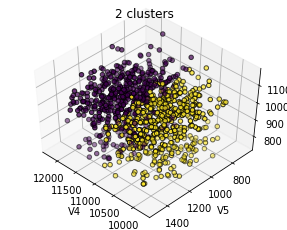

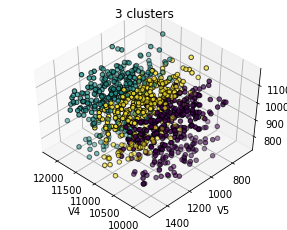

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# X = np.array([[1, 2], [1, 4], [1, 0],
#               [4, 2], [4, 4], [4, 0]])
# kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# print(kmeans.labels_)
# pred= kmeans.predict([[0, 0], [4, 4]])
# print(pred)
# print(kmeans.cluster_centers_)


np.set_printoptions(linewidth=400)    # screen size
np.set_printoptions(threshold=np.inf) # print all numpy output
dfTrain = pd.read_csv("../data_source/data01-train.csv",header=None)
dfTest = pd.read_csv("../data_source/data01-test.csv",header=None)
# 관찰치 1000개 추출
dfTrain = dfTrain[0:1000]
print(dfTrain.columns.values)
# 관찰치 2개에 컬럼이 1,2,12번째
print(dfTrain[0:2][[1,2,12]])
dfTrain.columns = ['Y1','Y2','V1','V2','V3','V4','V5','V6','v7','V8','V9','V10','V11']
dfTest.columns = ['Y1','Y2','V1','V2','V3','V4','V5','V6','v7','V8','V9','V10','V11']
print(dfTrain.columns.values)

kmeans = KMeans(n_clusters=3, random_state=0).fit(dfTrain[['V9','V10','V11']])
print(kmeans)
print(kmeans.cluster_centers_)

# for i in range(kmeans.labels_.size):
	# print(kmeans.labels_[i])

pred=kmeans.predict(dfTest[['V9','V10','V11']])
# for i in range(pred.size):
# 	print(pred[i])

X = dfTrain[['V4','V5','V6']].as_matrix().astype(int)
y = dfTrain[['Y2']]
estimators = [('k_means_2', KMeans(n_clusters=2)),
              ('k_means_3', KMeans(n_clusters=3))]

print(estimators)
fignum = 1
titles = ['2 clusters', '3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    print(labels[0:3])
    ax.scatter(X[:, 0], X[:, 1], X[:, 2],
           c=labels.astype(np.float), edgecolor='k')

    ax.set_xlabel('V4')
    ax.set_ylabel('V5')
    ax.set_zlabel('V6')
    ax.set_title(titles[fignum - 1])
    fignum = fignum + 1


plt.show()